<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Newton-Raphson Algorithm

### Modules - Root Finding
<section class="post-meta">
By Magnus A. Gjennestad, Vegard Hagen, Aksel Kvaal, Morten Vassvik, Trygve B. Wiig and Peter Berg
</section>
Last edited: March 11th 2018 
___

__Question:__

Is there a more efficient (faster) method to find the root $x_0$ of a function $f(x)$ other than the bisection algorithm?

__Example 1:__

Again, we would like to know where the function $g(x) = x$ intersects the function $h(x) = e^{−x}$ (see module on bisection algorithm). And again, we need to solve
$$x = e^{-x}.$$
This is equivalent to finding the root $x_0$ of $f(x) = e^{−x} − x = 0$:
$$f(x_0)=e^{−x_0} −x_0 =0$$.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

When we plot $f$, we see that it should have one unique root near $x = 0.6$, as shown in the graph.

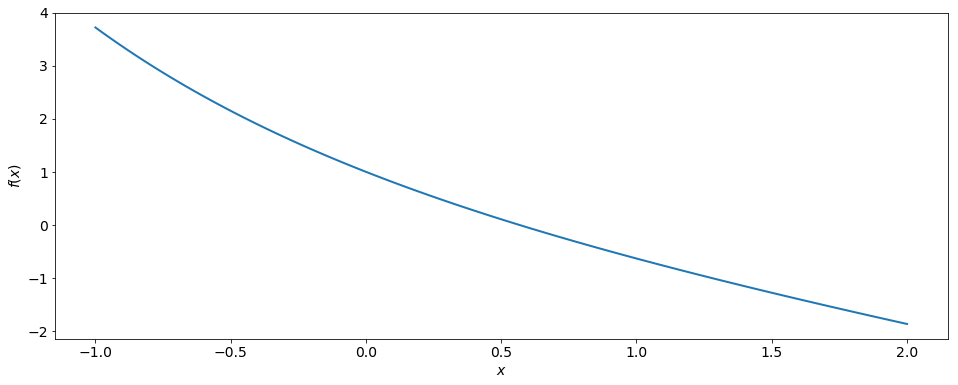

In [7]:
x = np.linspace(-1, 2, 100)
def f(x): return np.exp(-x)-x

plt.plot(x, f(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid();

How can we find this root (other than with the bisection method)?

The idea is to start with a guess $x_1$ and the corresponding point on the graph $(x_1 , f(x_1))$. Let’s pick $x_1 = −0.5$. Then we "follow" the line tangent to the graph at that point until we hit the x-axis.

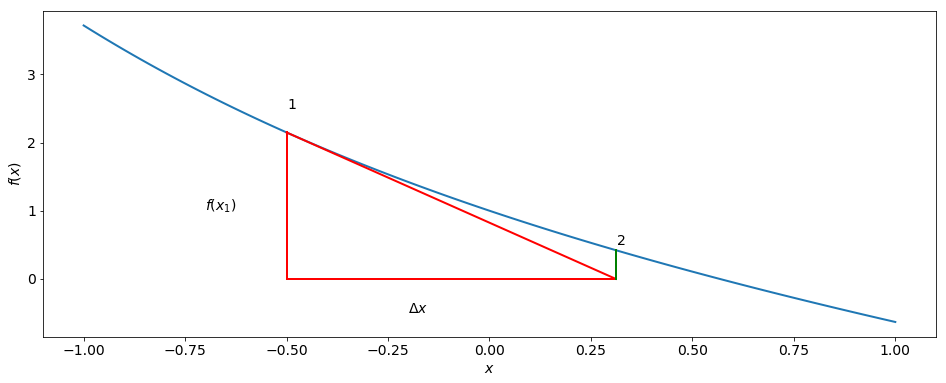

In [4]:
x = np.linspace(-1, 1, 100)
def f(x): return np.exp(-x)-x

x1 = -0.5
dfdx_x1 = -np.exp(-x1)-1  # Derivative of f(x) at point x1
x2 = x1-f(x1)/dfdx_x1     # Zero of tangent

# Plot function
plt.plot(x, f(x))

# Plot lines:
plt.plot([x1,x1], [f(x1),0], 'r')
plt.plot([x1,x2], [0, 0], 'r')
plt.plot([x1,x2], [f(x1),0], 'r')
plt.plot([x2,x2], [f(x2),0], 'g')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.text(-0.2, -0.5, r'$\Delta x$')
plt.text(-0.7, 1, r'$f(x_1)$')
plt.text(x1, 2.5, r'$1$')
plt.text(x2, 0.5, r'$2$')
plt.grid();

The intersection of tangent line and $x$-axis gives us a new estimate, $x_2$, of the root. As we can see, we are indeed closer to the real root now.

We can repeat this procedure, i.e. following a tangent line at $x_2$ until we hit the $x$-axis again. This yields our next guess $x_3$, and so on.

From the previous plot, we can see that the difference $\Delta x$ (where $\Delta x = x_\mathrm{next} − x_\mathrm{cur})$ between the current guess, $x_\mathrm{cur}$, and the next guess, $x_\mathrm{next}$, is related to the slope of the tangent line, $f′(x_\mathrm{cur})$, via (note the minus sign)
$$f′(x_\mathrm{cur}) = −\frac{f(x_\mathrm{cur})}{\Delta x}.$$

This yields
$$x_\mathrm{next} =x_\mathrm{cur} +\Delta x = x_\mathrm{cur} − \frac{f(x_\mathrm{cur})}{f'(x_\mathrm{cur})}.$$
This procedure can be formulated as the following __Newton-Raphson algorithm__ (also called Newton’s method):
1. Guess a value $x_\mathrm{cur}$ of the root of the function $f(x)$. Sometimes, plotting helps to guess a value (see above).
2. If there is more than one root, try to choose a value close to the root one is interested in.
3. Set $x_\mathrm{next} = x_\mathrm{cur} − \frac{f(x_\mathrm{cur})}{f'(x_\mathrm{cur})}$ as the next estimate of the root.
4. Set $x_\mathrm{cur} = x_\mathrm{next}$.
5. Repeat steps 3 and 4 until desired accuracy is achieved.

Accuracy can refer to two phenomena:
1. When the algorithm converges, $\Delta x$ ultimately decreases with each iteration. The question is: at what value of $\Delta x$ should we stop our iterative procedure?
2. How close is $f(x_\mathrm{cur})$ to zero?

Note: In each case, we cannot be sure how close we really are to the actual root $x_0$. This has a lot to do with the behavior of the function $f$ near $x_0$.
- In case 1, $\Delta x$ could in principle increase again during the next iteration.
- In case 2, the magnitude of $f(x_\mathrm{cur})$ could in principle increase again in the next iteration.

If the root lies in a region where $f(x)$ is nearly linear, the algorithm will converge quickly, much faster than the bisection algorithm.

However, there is generally no guarantee that the algorithm converges. Two phenomena frequently occur when the Newton-Raphson algorithm is applied. Let us discuss them one by one.

__Problem No. 1:__
The derivative $f′(x_\mathrm{cur})$ can sometimes become very small, making $\Delta x = − \frac{f(x_\mathrm{cur})}{f′(x_\mathrm{cur})}$ very large. This is the case near local minima and maxima, or potentially at a (horizontal) inflection
point.

The next guess $x_\mathrm{next}$ is then far away from the actual root. The computer code may stop due to numbers too large in nature, or one enters the region of another root. In other words, one does not return to anywhere near the root of interest.
In this case, the initial guess needs to be changed. Or we can limit the step size $\Delta x$.

__Problem No. 2:__
The algorithm does neither converge or diverge. Rather, it remains within the vicinity of the root, oscillating in an infinite loop about the actual root without approaching it.

Again, the initial guess needs to be changed. Or we need to reduce the step size further (relaxation): we can replace $\Delta x$ by $\gamma \Delta x$, with $0 < \gamma < 1$.
___

Sometimes, it can be useful to use the slower but reliable bisection method first so as to get close enough to the actual root to provide a good initial guess for the faster Newton-Raphson method. The latter takes over at some point, providing better convergence.

Another useful trick is to approximate the derivative $f′(x_\mathrm{cur})$ by 
$$f′(x_\mathrm{cur}) \approx \frac{f(x_\mathrm{cur} + \delta x)−f(x_\mathrm{cur})}{\delta x}$$
for some small value $\delta x$. This comes in handy when the derivative cannot be computed easily in analytical form and a numerical estimate is required.

__Example 2:__

We want to solve the equation
$$ 2 - x^4 = \tanh(x)$$
for $x > 0$. Hence, we need to solve
$$f(x) = 2 - x^4 - \tanh(x).$$
Our algorithm reads
$$
\begin{align}
x_\mathrm{next} = x_\mathrm{cur} - \frac{f(x_\mathrm{cur})}{f'(x_\mathrm{cur})} = \frac{2-x_\mathrm{cur}^4-\tanh(x_\mathrm{cur})}{-4 x_\mathrm{cur}^3-\frac{1}{\cosh(x_\mathrm{cur})^2}}.
\end{align}
$$
Plotting $f(x)$ helps us in making an initial guess.

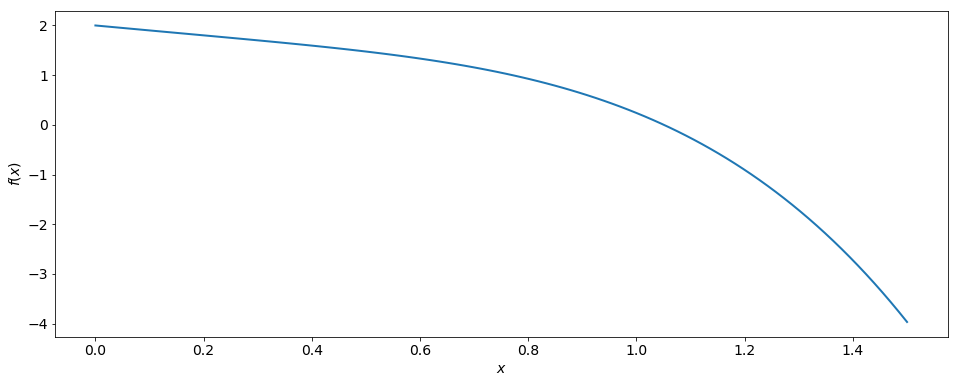

In [5]:
x = np.linspace(0, 1.5, 100)
def f(x): return 2 - x**4 - np.tanh(x)

plt.plot(x, f(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid();

We choose $x_\mathrm{cur} = x_1 = 1.0$.

We now iterate and find the following successive estimates for the root for the first 5 iterations (up to 12 significant digits):

In [6]:
N = 5

x_cur = 1.0
print(x_cur)

for i in range(N):
    x_cur = x_cur-(2-x_cur**4-np.tanh(x_cur))/(-4*x_cur**3-1/(np.cosh(x_cur))**2)
    print(x_cur)
    
print(r'Value at last iteration, f(x_cur) = %s' % f(x_cur))

1.0
1.0539382868809093
1.0505495562464537
1.0505350542199834
1.05053505395561
1.05053505395561
Value at last iteration, f(x_cur) = -2.220446049250313e-16


We see that 5 iterations are sufficient in this case!
The bisection algorithm would require many more iterations for the same accuracy.

The value of $f(x)$ for our final root estimate is
$$f(1.05053505396) =  -2.22044604925 \times 10^{-16}.$$
A very good estimate!

__Note:__
Newton’s method can be extended to higher dimensions, i.e. having $k$ variables and $k$ functions of which we need to find the roots simultaneously. This is particularly relevant for numerical solutions of differential equations. However, these intricacies of Newton’s method will not be covered in this module.